In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('ficha_tecnica.csv')
df2 = pd.read_csv('wines2.csv')

In [27]:
df.shape

(3731, 21)

In [28]:
df2.shape

(756, 5)

In [35]:
df2.columns

Index(['Nome', 'Preço_Sócio', 'Preço_Normal', 'Pontuação', 'Avaliações'], dtype='object')

In [36]:
df.columns

Index(['Nome', 'Somelier', 'Preço_Sócio', 'Preço_Normal', 'Tipo', 'Vinícola',
       'Teor_Alcoólico', 'Amadurecimento', 'Safra', 'Classificação', 'Visual',
       'Olfativo', 'Gustativo', 'Temperatura', 'Potencial_Guarda',
       'Harmonização', 'Link', 'Avaliações', 'Volume', 'País', 'Região'],
      dtype='object')

In [42]:
df2 = df2[~df2.Nome.str.contains("WineBox")]

In [43]:
df2 = df2[~df2.Nome.str.contains('Kit')]

In [44]:
df2 = df2[~df2.Nome.str.contains('KIT')]

In [66]:
df = pd.merge(df, df2, on='Nome', how='outer')

In [74]:
df.columns

Index(['Nome', 'Somelier', 'Tipo', 'Vinícola', 'Teor_Alcoólico',
       'Amadurecimento', 'Safra', 'Classificação', 'Visual', 'Olfativo',
       'Gustativo', 'Temperatura', 'Potencial_Guarda', 'Harmonização', 'Link',
       'Volume', 'País', 'Região', 'Preço_Sócio_y', 'Preço_Normal_y',
       'Pontuação_x', 'Avaliações_y', 'Preço_Sócio', 'Preço_Normal',
       'Pontuação_y', 'Avaliações'],
      dtype='object')

In [72]:
df.loc[df.Preço_Normal_y.notna(), 'Preço_Normal'] = df.loc[df.Preço_Normal_y.notna(), 'Preço_Normal_y'] 

In [73]:
df.loc[df.Preço_Sócio_y.notna(), 'Preço_Sócio'] = df.loc[df.Preço_Sócio_y.notna(), 'Preço_Sócio_y'] 

In [76]:
df.loc[df.Pontuação_y.notna(), 'Pontuação'] = df.loc[df.Pontuação_y.notna(), 'Pontuação_y']

In [77]:
df.loc[df.Avaliações_y.notna(), 'Avaliações'] = df.loc[df.Avaliações_y.notna(), 'Avaliações_y']

In [79]:
df = df.drop(['Preço_Sócio_y', 'Preço_Normal_y', 'Pontuação_x', 'Avaliações_y', 'Pontuação_y'], axis=1)

In [82]:
df.Pontuação.notna().sum()

522

In [90]:
df[df.Pontuação.notna()].Avaliações.isna().sum()

0

In [92]:
pontos = [] 
for row in df[df.Pontuação.notna()].itertuples():
    pontos.extend([row.Pontuação] * int(row.Avaliações))

In [94]:
len(pontos)

12491

In [95]:
def cat_points(points):
    if points in list(range(0,1)):
        return 0
    elif points in list(range(1,2)):
        return 1
    elif points in list(range(2,3)):
        return 2
    elif points in list(range(3,4)):
        return 3
    elif points in list(range(4,5)):
        return 4
    else:
        return 5

df["rating_cat"] = df[df.Pontuação.notna()].Pontuação.apply(cat_points)

In [96]:
df.rating_cat

0       NaN
1       NaN
2       5.0
3       NaN
4       4.0
       ... 
3811    NaN
3812    5.0
3813    3.0
3814    5.0
3815    4.0
Name: rating_cat, Length: 3816, dtype: float64

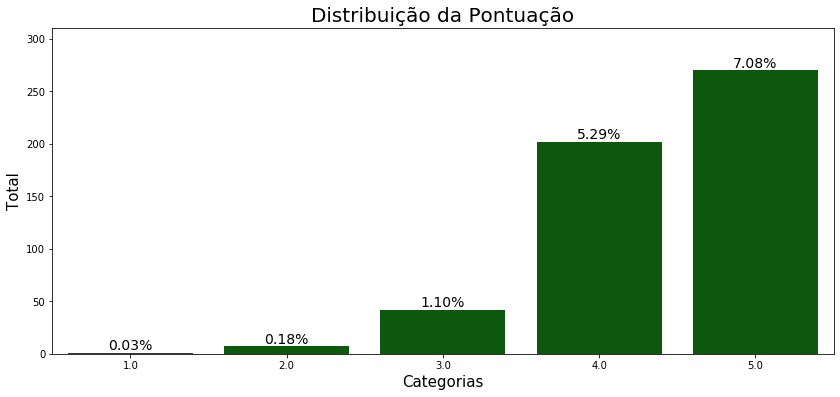

In [99]:
total = len(df)
plt.figure(figsize=(14,6))

g = sns.countplot(x='rating_cat', color='darkgreen',
                  data=df)
g.set_title("Distribuição da Pontuação", fontsize=20)
g.set_xlabel("Categorias", fontsize=15)
g.set_ylabel("Total", fontsize=15)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.15)

plt.show()

In [104]:
df.País.unique()

array(['Portugal', 'Espanha', nan, 'Argentina', 'África do Sul',
       'Uruguai', 'Estados Unidos', 'França', 'Itália', 'Brasil',
       'Austrália', 'Alemanha', 'Hungria'], dtype=object)

In [108]:
df[df.Preço_Normal.notna()]

,Nome,Somelier,Tipo,Vinícola,Teor_Alcoólico,Amadurecimento,Safra,Classificação,Visual,Olfativo,...,Harmonização,Link,Volume,País,Região,Preço_Sócio,Preço_Normal,Avaliações,Pontuação,rating_cat
2,5 Oros Crianza D.O.Ca. Rioja 2014,"Com presença de fruta e madeira, esse vinho é ...",Tinto,Bodegas Isidro Milagro,0.140,18 meses em barricas de carvalho francês e ame...,2014.0,Seco,Rubi,"Frutas vermelhas, especiarias, amadeirado",...,"Maminha ao forno, abobrinha recheada, risoto d...",https://wine.com.br/vinhos/5-oros-crianza-d-o-...,750.00,Espanha,Rioja,71.90,84.59,9.0,4.5,5.0
4,5 Oros Vendimia Seleccionada D.O.Ca. Rioja 2016,"As uvas que deram vida a esse exemplar, foram ...",Tinto,Bodegas Isidro Milagro,0.140,Não passa por barricas de carvalho.,2016.0,Seco,Rubi,"Frutas vermelhas, frutas negras",...,"Fraldinha recheada com parmesão e bacon, estro...",https://wine.com.br/vinhos/5-oros-vendimia-sel...,750.00,Espanha,Rioja,70.90,83.41,2.0,4.0,4.0
7,A Galet Tinto,Um blend tradicional da Espanha que surpreende...,Tinto,Bodegas D. Mateos,0.135,30% em barriques de 225ml francês usadas e 70%...,NaN,Seco,Rubi,"Frutas vermelhas, morango, framboesa e um toqu...",...,"Carpaccio de carne, rosbife, risoto de parmesã...",https://wine.com.br/vinhos/a-galet-tinto/prod2...,750.00,Espanha,La Rioja,25.95,30.53,5.0,4.0,4.0
39,Almaviva 2016,"Pontuado por Robert Parker, James Suckling, Ja...",Tinto,Almaviva,0.140,16 meses em barricas de carvalho francês.,2016.0,Seco,Rubi,"Ameixa, framboesa, cereja, groselha, ervas, es...",...,"Magret de pato, risoto de funghi, medalhão de ...",https://wine.com.br/vinhos/almaviva-2016/prod2...,750.00,NaN,NaN,1317.50,1550.00,NaN,NaN,NaN
44,Almaviva EPU 2015 375 ml,"Tinto rico em aromas, apresenta notas de fruta...",Tinto,Almaviva,0.145,12 meses em barricas de carvalho francês.,2015.0,Seco,Rubi intenso,"Groselha negra, amora, cereja, chocolate amarg...",...,"Ancho na parrilla, risoto de funghi porcini, c...",https://wine.com.br/vinhos/almaviva-epu-2015-3...,375.00,NaN,NaN,212.41,237.40,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,Espumante Jeroboam Chandon Rosé Brut 3 L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,591.09,695.40,NaN,NaN,NaN
3812,370 Léguas Reserva D.O.C. Douro 2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,37.32,43.90,131.0,4.5,5.0
3813,Viña Carrasco Carmenere 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24.58,28.92,1.0,3.0,3.0
3814,Protos Rosé 2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,53.90,63.41,8.0,3.5,5.0


In [106]:
df[df.Somelier.notna()].shape

(3708, 23)

In [107]:
df[df.Avaliações.notna()].shape

(522, 23)